In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from freeenergyframework import plotting, stats, wrangle, absolute

In [2]:
raw_results = wrangle.read_csv('data/example.csv')

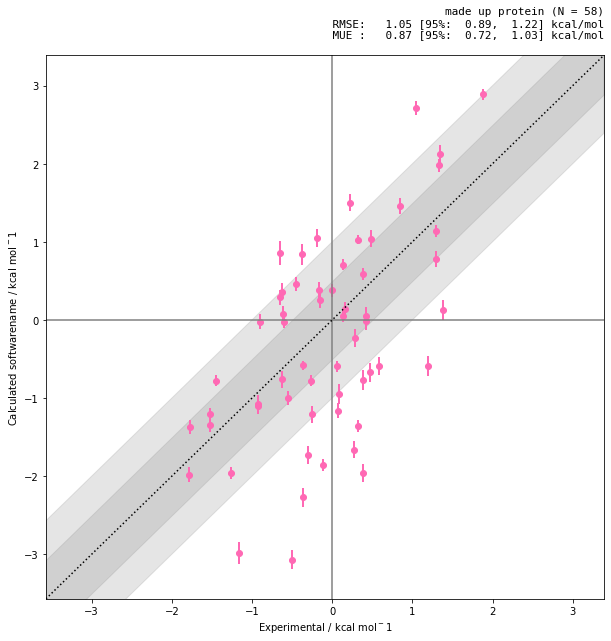

In [3]:
plotting.plot_DDGs(raw_results,method_name='softwarename',target_name='made up protein')

The above is the absolute raw data of simulations that have been run, however the direction of the simulation is run in is arbitrary, and any data point could equally be plotted in the opposite quadrant. This means that correlation statistics aren't robust for these methods.

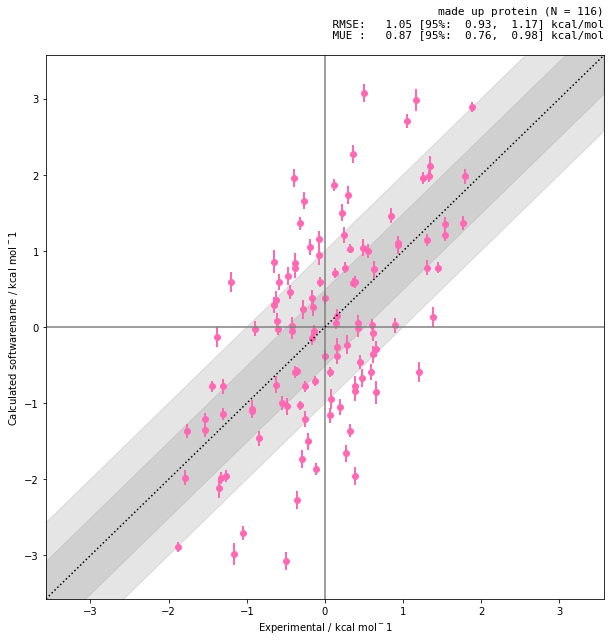

In [4]:
plotting.plot_DDGs(raw_results,method_name='softwarename',symmetrise=True,target_name='made up protein')

In [5]:
def plot_all_DGs(results,method_name='',target_name=''):
    import absolute
    import matplotlib.pylab as plt
    import stats
    import itertools
    # data
    x_abs, y_abs, xabserr, yabserr = absolute.generate_absolute_values(results)

    # do all to plot_all
    x_data = []
    y_data = []
    xerr = []
    yerr = []
    for a, b in itertools.combinations(range(len(x_abs)),2):
        x = x_abs[a] - x_abs[b]
        x_data.append(x)
        x_data.append(-x)
        err = (xabserr[a]**2 + xabserr[b]**2)**0.5
        xerr.append(err)
        xerr.append(err)
        y = y_abs[a] - y_abs[b]
        y_data.append(y)
        y_data.append(-y)
        err = (yabserr[a]**2 + yabserr[b]**2)**0.5
        yerr.append(err)
        yerr.append(err)
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
#     x_data = np.asarray(x_data)
#     y_data = np.asarray(y_data)    
    nsamples = len(x_data)
    # aesthetics
    plt.figure(figsize=(10,10))
    plt.xlabel(f'Experimental / kcal mol$^{-1}$')
    plt.ylabel(f'Calculated {method_name} / kcal mol$^{-1}$')

    ax_min = min(min(x_data),min(y_data)) - 0.5
    ax_max = max(max(x_data),max(y_data)) + 0.5
    scale = [ax_min,ax_max]

    plt.xlim(scale)
    plt.ylim(scale)
    plt.plot([0, 0],scale, 'gray')
    plt.plot(scale, [0, 0], 'gray')
    plt.plot(scale,scale,'k:')
    small_dist = 0.5
    plt.fill_between(scale,[ax_min-small_dist,ax_max-small_dist],[ax_min+small_dist,ax_max+small_dist],color='grey',alpha=0.2)
    plt.fill_between(scale,[ax_min-small_dist*2,ax_max-small_dist*2],[ax_min+small_dist*2,ax_max+small_dist*2],color='grey',alpha=0.2)

    # actual plotting
    plt.scatter(x_data, y_data, color='hotpink')
    plt.errorbar(x_data, y_data, xerr=xerr, yerr=yerr,color='hotpink',linewidth=0.,elinewidth=2.)

    # stats and title

    stats = {
        statistic : stats.bootstrap_statistic(x_data, y_data, statistic=statistic)
        for statistic in ('RMSE', 'MUE')
    }

    title = """{} (N = {})
    RMSE:  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
    MUE :  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
    """.format(target_name, nsamples,
               stats[('RMSE')]['mle'], stats[('RMSE')]['low'], stats[('RMSE')]['high'],
               stats[('MUE')]['mle'], stats[('MUE')]['low'], stats[('MUE')]['high']
              )
    plt.title(title, fontsize=11, loc='right', horizontalalignment='right', family='monospace')
    plt.show()


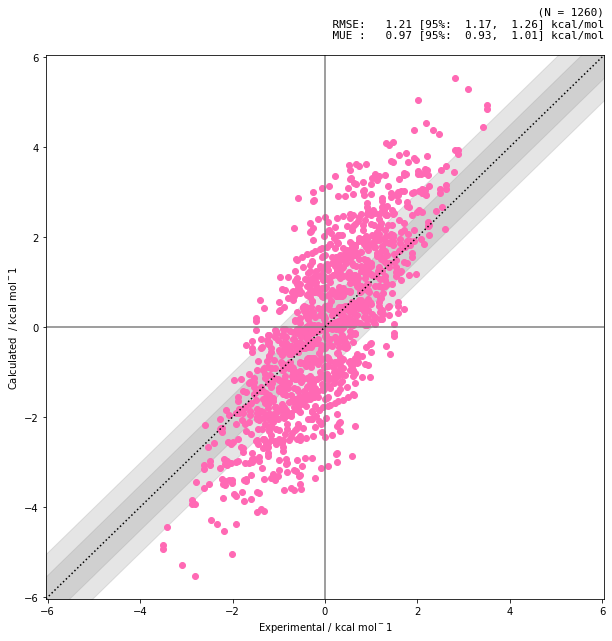

In [6]:
plot_all_DGs(raw_results)

The above symmetrises, and plots each simulation twice, with the positive and negative values. This has the consequence of duplicating the number of datapoints, however does not effect the RMSE or MUE. If we were to want to report correlation statistics, this would be a consistent way in which to do it (but I don't think we should report correlation stats for this anyway). This may break down if some methods perform both backwards and forwards runs of the same edge.

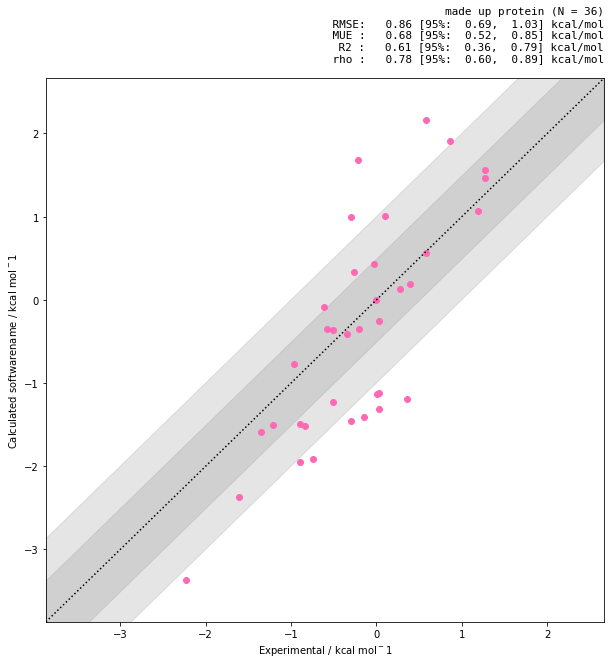

In [7]:
plotting.plot_DGs(raw_results,method_name='softwarename',target_name='made up protein')

MLE has been used to convert the relative results into absolute ones, error bars are plotted, but very small (maybe a bug?... double check).
The molecule that is set to zero is completely arbitrary, if this is to be shifted to the true results then we need one known experimental values to be entered (to keep input simple this isn't currently a 'known' to the data). But the shift will do nothing to the statistics.